In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load data

inputs = pd.read_csv('all_inputs_cleaned.csv', parse_dates = True, index_col = 'Month')
inputs.drop(['Unnamed: 0'], axis = 1, inplace = True)

outputs = pd.read_csv('all_outputs_cleaned.csv', parse_dates = True, index_col = 'Month')
outputs.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [3]:
# features

print(inputs.head())

print('\n\n')

print(inputs.info())

                 CPI  InterestRate       GDP  ValAddConst  ValAddInfo  \
Month                                                                   
2006-06-01  0.005007      0.031315  0.012731     0.016023    0.000000   
2006-07-01  0.002989      0.010122  0.012731     0.016023    0.000000   
2006-08-01  0.002484      0.050100  0.010429     0.000000    0.014294   
2006-09-01  0.005451      0.001908  0.010429     0.000000    0.014294   
2006-10-01  0.004436      0.000000  0.010429     0.000000    0.014294   

            Borrowing  CommercialLoan  ConsumerLoan   Deficit  ITBPrice  \
Month                                                                     
2006-06-01  -0.004089           0.178         0.054 -2.393523 -0.141342   
2006-07-01   0.016496           0.201         0.078 -1.361045 -0.087839   
2006-08-01   0.007533           0.223         0.045 -1.478174 -0.021042   
2006-09-01  -0.008966           0.177         0.056 -2.616416  0.046412   
2006-10-01  -0.005700           0.222 

In [4]:
# targets

print(outputs.head())

print('\n\n')

print(outputs.info())

            Construction  Information  Total_Private
Month                                               
2006-06-01     -0.001815    -0.000987       0.000744
2006-07-01      0.001689    -0.001647       0.001250
2006-08-01      0.001037     0.001320       0.001117
2006-09-01     -0.000259    -0.002306       0.000567
2006-10-01     -0.004664    -0.001321       0.000331



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 2006-06-01 to 2023-09-01
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Construction   204 non-null    float64
 1   Information    204 non-null    float64
 2   Total_Private  204 non-null    float64
dtypes: float64(3)
memory usage: 6.4 KB
None


We do the exploratory data analysis for __Total_Private__ and its features. The code can be replicated for Construction and Information

In [5]:
#Features for Total_Private

allFeatures = inputs.drop(columns = ['ValAddConst', 'ValAddInfo'])
target = outputs['Total_Private']
df = allFeatures.copy()
df['lag1_Total_Private'] = target.shift(1)
df['lag2_Total_Private'] = target.shift(2)
df['Total_Private'] = target

#Drop NA values

df = df.dropna()

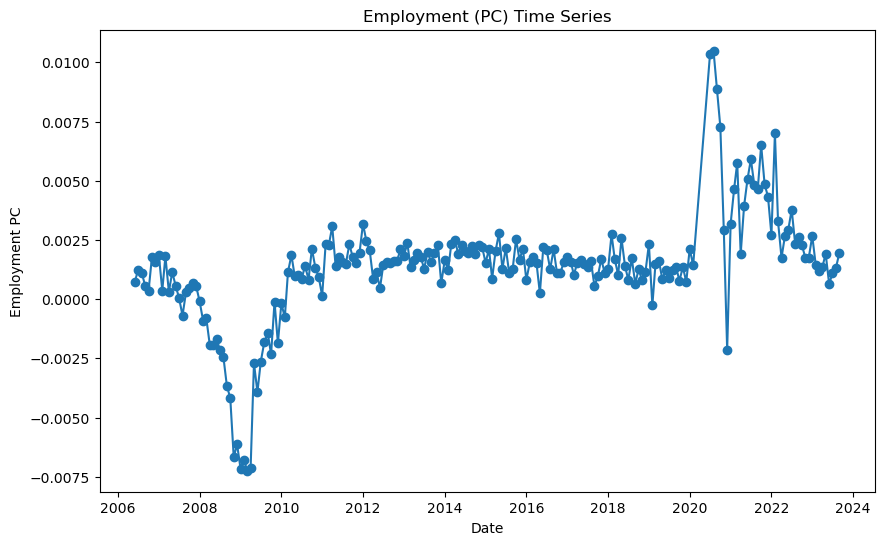

In [6]:
# Plotting the time series

plt.figure(figsize = (10, 6))
plt.plot(allFeatures.index, target, marker = 'o', linestyle = '-')
plt.xlabel('Date')
plt.ylabel('Employment PC')
plt.title('Employment (PC) Time Series')
plt.show()

In [7]:
df

,CPI,InterestRate,GDP,Borrowing,CommercialLoan,ConsumerLoan,Deficit,ITBPrice,ITBVol,VGTPrice,VGTVol,S&P500Price,S&P500Vol,lag1_Total_Private,lag2_Total_Private,Total_Private
Month,,,,,,,,,,,,,,,,
2006-08-01,0.002484,0.050100,0.010429,0.007533,0.223,0.045,-1.478174,-0.021042,0.796079,0.032067,-0.368216,0.013990,0.089268,0.001250,0.000744,0.001117
2006-09-01,0.005451,0.001908,0.010429,-0.008966,0.177,0.056,-2.616416,0.046412,2.381466,0.066667,0.267074,0.022189,-0.029398,0.001117,0.001250,0.000567
2006-10-01,0.004436,0.000000,0.010429,-0.005700,0.222,0.074,0.951423,0.046867,-0.436061,0.044646,0.280520,0.028076,0.159019,0.000567,0.001117,0.000331
2006-11-01,-0.004907,0.000000,0.009469,0.023126,-0.015,0.049,-1.867886,0.009897,0.644040,0.037128,0.730173,0.023816,-0.025526,0.000331,0.000567,0.001795
2006-12-01,-0.004438,0.000000,0.009469,0.037200,0.073,0.061,-1.878113,0.089600,-0.575326,0.006345,-0.558166,0.014591,-0.140307,0.001795,0.000331,0.001557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,0.000530,0.038710,0.012081,0.166242,0.013,0.073,0.440654,0.052962,0.067876,0.038191,-0.165449,0.009060,0.254976,0.001347,0.001183,0.001916
2023-06-01,0.003678,0.047619,0.011676,0.062205,-0.029,0.058,-1.465993,0.066633,-0.030136,0.092126,0.350401,0.034360,-0.010638,0.001916,0.001347,0.000645
2023-07-01,0.001241,0.003953,0.011676,0.001615,-0.026,0.060,-2.364214,0.079389,0.066784,0.040382,-0.028132,0.047030,-0.146846,0.000645,0.001916,0.001087


In [8]:
# Correlation

df.corr()

,CPI,InterestRate,GDP,Borrowing,CommercialLoan,ConsumerLoan,Deficit,ITBPrice,ITBVol,VGTPrice,VGTVol,S&P500Price,S&P500Vol,lag1_Total_Private,lag2_Total_Private,Total_Private
CPI,1.000000,0.269659,0.187537,-0.091651,0.035113,0.285354,-0.020779,0.082549,0.072440,-0.026575,0.074280,0.052164,0.072421,0.324143,0.336439,0.292658
InterestRate,0.269659,1.000000,0.171768,-0.116116,0.037068,0.280701,0.053786,-0.070163,0.043703,-0.107632,0.009192,-0.101000,-0.030213,0.228697,0.246875,0.217065
GDP,0.187537,0.171768,1.000000,0.106373,0.365457,0.238702,0.020415,0.023973,0.027558,-0.131647,0.017686,-0.020464,-0.001892,0.390799,0.373198,0.397744
Borrowing,-0.091651,-0.116116,0.106373,1.000000,0.311600,0.208038,-0.018387,0.003440,-0.042004,-0.058661,0.000547,-0.131857,-0.054267,-0.018064,0.031206,-0.049329
CommercialLoan,0.035113,0.037068,0.365457,0.311600,1.000000,0.440621,-0.069775,-0.090309,-0.020905,-0.168633,0.010563,-0.196774,0.001073,0.017379,0.048268,-0.007519
ConsumerLoan,0.285354,0.280701,0.238702,0.208038,0.440621,1.000000,-0.097719,-0.078678,-0.084671,-0.093264,0.108975,-0.110838,0.087116,0.191875,0.237759,0.174613
Deficit,-0.020779,0.053786,0.020415,-0.018387,-0.069775,-0.097719,1.000000,0.030947,0.012517,0.030074,-0.060944,-0.013951,-0.028191,0.016810,-0.001508,0.039790
ITBPrice,0.082549,-0.070163,0.023973,0.003440,-0.090309,-0.078678,0.030947,1.000000,0.016977,0.547354,-0.222334,0.568642,-0.202825,0.114386,0.028857,0.127314
ITBVol,0.072440,0.043703,0.027558,-0.042004,-0.020905,-0.084671,0.012517,0.016977,1.000000,-0.099025,0.326338,-0.021973,0.270772,-0.020798,0.002364,-0.010175
VGTPrice,-0.026575,-0.107632,-0.131647,-0.058661,-0.168633,-0.093264,0.030074,0.547354,-0.099025,1.000000,-0.281401,0.763013,-0.288792,0.079094,-0.037162,0.126885


In [9]:
# Import sklearn libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler


import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

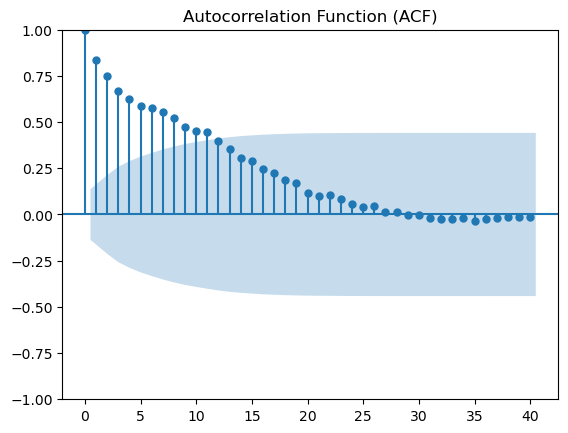

In [10]:
# ACF plot 

plot_acf(target, lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()


/Users/tejaswitripathi/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


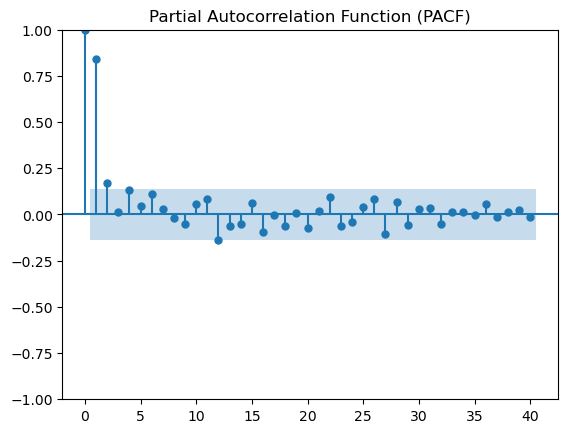

In [11]:
# PACF plot

plot_pacf(target, lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [12]:
# Lasso Regression for feature selection

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.iloc[:, :-1])
y = df.iloc[:, -1].values.reshape(-1,1)

alphas = [0.00000001, 0.0000001, 0.000001, 0.00001, 0.001]
numFeatures = len(df.iloc[:, :-1].columns)
lassoCoeff = np.empty((len(alphas), numFeatures))

for i in range(len(alphas)):
    model = Lasso(alpha = alphas[i], max_iter = 5000000)
    model.fit(X_scaled, y)
    lassoCoeff[i, :] = model.coef_

pd.DataFrame(np.round(lassoCoeff, 8), columns = df.iloc[:, :-1].columns, index = ['alpha=' + str(a) for a in alphas])

,CPI,InterestRate,GDP,Borrowing,CommercialLoan,ConsumerLoan,Deficit,ITBPrice,ITBVol,VGTPrice,VGTVol,S&P500Price,S&P500Vol,lag1_Total_Private,lag2_Total_Private
alpha=1e-08,-0.000006,0.000033,0.000269,-0.000083,-0.000112,0.000041,0.000054,-0.000014,-0.000004,0.000239,-0.000005,0.000017,0.000089,0.001516,0.000439
alpha=1e-07,-0.000006,0.000033,0.000269,-0.000082,-0.000111,0.000041,0.000054,-0.000014,-0.000004,0.000239,-0.000004,0.000017,0.000089,0.001517,0.000439
alpha=1e-06,-0.000004,0.000032,0.000268,-0.000082,-0.000110,0.000039,0.000053,-0.000012,-0.000003,0.000237,-0.000003,0.000016,0.000087,0.001517,0.000438
alpha=1e-05,0.000000,0.000028,0.000254,-0.000075,-0.000094,0.000025,0.000044,-0.000000,-0.000000,0.000221,-0.000000,0.000012,0.000074,0.001521,0.000432
alpha=0.001,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.001022,0.000000


In [13]:
# Perform Linear Regression without feature selection

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size = 0.2)

linearReg1 = LinearRegression()
linearReg1.fit(X_train, y_train.values.reshape(-1,1))
pred1 = linearReg1.predict(X_test)

mse1 = mean_squared_error(y_test, pred1)
score1 = r2_score(y_test, pred1)
print('MSE:', mse1)
print('R2 Score:', score1)

MSE: 2.5014163855959634e-06
R2 Score: 0.6399615706416664


In [14]:
# Perform Linear Regression, Decision Tree, Random Forest, Gradient Boosting with
# features = ['GDP', 'VGTPrice', 'lag1_Total_Private', 'lag2_Total_Private']

features = ['GDP', 'VGTPrice', 'lag1_Total_Private', 'lag2_Total_Private']

X_train, X_test, y_train, y_test = train_test_split(df[features], df.iloc[:, -1], random_state = 0, test_size = 0.2)

# Linear Regression
linearReg = LinearRegression()
linearReg.fit(X_train, y_train.values.reshape(-1,1))
predLR = linearReg.predict(X_test)
mseLR = mean_squared_error(y_test, predLR)
scoreLR = r2_score(y_test, predLR)

# Decision Tree Regression
decisionTree = DecisionTreeRegressor(random_state = 0, max_depth = 8)
decisionTree.fit(X_train, y_train.values.reshape(-1,1))
predDT = decisionTree.predict(X_test)
mseDT = mean_squared_error(y_test, predDT)
scoreDT = r2_score(y_test, predDT)

# Random Forest Regression
randomForest = RandomForestRegressor(random_state = 0, max_depth = 8)
randomForest.fit(X_train, y_train.values.reshape(-1,1))
predRF = randomForest.predict(X_test)
mseRF = mean_squared_error(y_test, predRF)
scoreRF = r2_score(y_test, predRF)

# Gradient Boosting Regression
gradientBoosting = GradientBoostingRegressor(learning_rate = 0.01, random_state = 0)
gradientBoosting.fit(X_train, y_train.values.reshape(-1,1))
predGB = gradientBoosting.predict(X_test)
mseGB = mean_squared_error(y_test, predGB)
scoreGB = r2_score(y_test, predGB)

# Table of MSE and Coeff. of Determination

scoreArr = {'LinReg' : [mseLR, scoreLR], 'DecTree' : [mseDT, scoreDT], 'RanForest': [mseRF, scoreRF], 'GradBoost': [mseGB, scoreGB]}
scoreDF = pd.DataFrame(data = scoreArr, index = ['MSE', 'R2'])
scoreDF

/var/folders/q9/r_rdcyzn3_3gg5m0p2zrx_xh0000gn/T/ipykernel_31042/3599177142.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest.fit(X_train, y_train.values.reshape(-1,1))
/Users/tejaswitripathi/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,LinReg,DecTree,RanForest,GradBoost
MSE,0.000001,0.000004,0.000003,0.000002
R2,0.659081,-0.229465,0.198730,0.294472


/Users/tejaswitripathi/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/tejaswitripathi/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/tejaswitripathi/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MSE: 1.4931048175352897e-05
MAE 0.0025867479633413445


/Users/tejaswitripathi/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


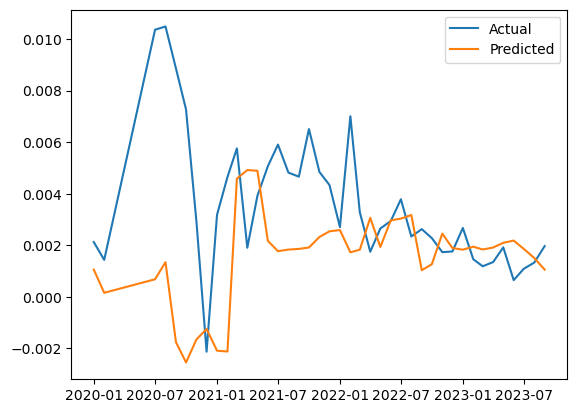

In [15]:
# ARIMAX without feature selection

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Fit ARIMAX model on the training data
order = (2, 0, 5)  
arima = sm.tsa.ARIMA(train.iloc[:, -1], order = order, exog = train.iloc[:, :-3])
results = arima.fit()

# Forecast on the test sets
forecast = results.predict(start=len(train), end=len(train) + len(test) - 1, exog = test.iloc[:, :-3], dynamic=False)

# Calculate metrics
mse = mean_squared_error(test.iloc[:, -1], forecast)
mae = mean_absolute_error(test.iloc[:, -1], forecast)

print('MSE:',mse)
print('MAE', mae)

plt.plot(test.index, test.iloc[:, -1], label='Actual')
plt.plot(test.index, forecast, label='Predicted')
plt.legend()
plt.show()

In [19]:
# Neural Network Regression 

import torch
import torch.nn as nn
import torch.optim as optim

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]
X_train, X_test, y_train, y_test = train.iloc[:,:-3], test.iloc[:,:-3], train.iloc[:,-1], test.iloc[:,-1]

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test)

# Define the neural network
class RegressionModel(nn.Module):
    def __init__(self, input_size):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)  # Adding dropout for regularization
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

    
# Initialize the model
input_size = X_train.shape[1]
model = RegressionModel(input_size)

# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 400
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs.squeeze(), y_train_tensor)
    loss.backward()
    optimizer.step()
    
    # Print training loss
    if (epoch + 1) % 20 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Training Loss: {loss.item()}')

# Evaluate the model
with torch.no_grad():
    model.eval()
    y_pred_tensor = model(X_test_tensor)
    mse = mean_squared_error(y_test_tensor.numpy(), y_pred_tensor.numpy().squeeze())

print(f'Mean Squared Error: {mse}')

Epoch 20/400, Training Loss: 0.006427804008126259
Epoch 40/400, Training Loss: 0.0024944404140114784
Epoch 60/400, Training Loss: 0.0014477195218205452
Epoch 80/400, Training Loss: 0.0011922799749299884
Epoch 100/400, Training Loss: 0.0007681191782467067
Epoch 120/400, Training Loss: 0.0005705169751308858
Epoch 140/400, Training Loss: 0.0005187136121094227
Epoch 160/400, Training Loss: 0.00024921129806898534
Epoch 180/400, Training Loss: 0.00023301765031646937
Epoch 200/400, Training Loss: 0.00014584018208552152
Epoch 220/400, Training Loss: 0.00016784323088359088
Epoch 240/400, Training Loss: 0.00015445002645719796
Epoch 260/400, Training Loss: 9.924277401296422e-05
Epoch 280/400, Training Loss: 7.092776650097221e-05
Epoch 300/400, Training Loss: 9.895388939185068e-05
Epoch 320/400, Training Loss: 3.93749178329017e-05
Epoch 340/400, Training Loss: 4.7585952415829524e-05
Epoch 360/400, Training Loss: 3.278921576566063e-05
Epoch 380/400, Training Loss: 4.176239235675894e-05
Epoch 400/40

In [23]:
# LSTM

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Take the output from the last time step
        return out

# Initialize the model
input_size = X_train.shape[1]
hidden_size = 64
num_layers = 2
output_size = 1
model = LSTMModel(input_size, hidden_size, num_layers, output_size)

# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 400
print_every = 20

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor.unsqueeze(1))  # Add a dimension for the sequence length
    loss = criterion(outputs.squeeze(), y_train_tensor)
    loss.backward()
    optimizer.step()

    # Print training loss every 20 epochs
    if (epoch + 1) % print_every == 0:
        print(f'Epoch {epoch+1}/{epochs}, Training Loss: {loss.item()}')

# Evaluate the model
with torch.no_grad():
    model.eval()
    y_pred_tensor = model(X_test_tensor.unsqueeze(1))
    mse = mean_squared_error(y_test_tensor.numpy(), y_pred_tensor.numpy().squeeze())

print(f'Mean Squared Error: {mse}')


Epoch 20/400, Training Loss: 4.300081400288036e-06
Epoch 40/400, Training Loss: 1.1556256140465848e-05
Epoch 60/400, Training Loss: 1.0254998414893635e-06
Epoch 80/400, Training Loss: 9.330595958090271e-07
Epoch 100/400, Training Loss: 7.25854249594704e-07
Epoch 120/400, Training Loss: 6.380993227139697e-07
Epoch 140/400, Training Loss: 5.849151989423262e-07
Epoch 160/400, Training Loss: 5.440493282549141e-07
Epoch 180/400, Training Loss: 5.103237299408647e-07
Epoch 200/400, Training Loss: 4.81373888305825e-07
Epoch 220/400, Training Loss: 4.558480668492848e-07
Epoch 240/400, Training Loss: 4.3291819906698947e-07
Epoch 260/400, Training Loss: 4.120719552247465e-07
Epoch 280/400, Training Loss: 3.9295960618801473e-07
Epoch 300/400, Training Loss: 3.753285682250862e-07
Epoch 320/400, Training Loss: 3.589839536743966e-07
Epoch 340/400, Training Loss: 3.437579891851783e-07
Epoch 360/400, Training Loss: 3.295164958672103e-07
Epoch 380/400, Training Loss: 3.161412394092622e-07
Epoch 400/400,